# Generating Sentences from a Continuous Space
A VAE was trained on sentences and learned latent space was used to generate new sentences.  
Paper: https://arxiv.org/pdf/1511.06349.pdf  
Implementation: https://github.com/timbmg/Sentence-VAE

In [1]:
!pip install tensorboardx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 29.7 MB/s 


In [2]:
!git clone https://github.com/timbmg/Sentence-VAE.git

Cloning into 'Sentence-VAE'...
remote: Enumerating objects: 97, done.
remote: Total 97 (delta 0), reused 0 (delta 0), pack-reused 97
Unpacking objects: 100% (97/97), done.


Data: Tweets about Turkish telecommunications company Turkcell  

In [6]:
import pandas as pd

data = pd.read_excel('/content/data/train_tweets.xlsx')
data

,Unnamed: 0,Unnamed: 1
0,Ulan Wifi'ye bağlıyım ben. Ona bağlıyken Turkc...,olumsuz
1,20 dk 1 GB internet 500 mb sadece kaşar turkce...,olumsuz
2,Ayrıca turkcell superonline reklamı kadar da k...,olumsuz
3,Turkcell çok pahalı ya,olumsuz
4,Turkcell Kaş'ta internetin cekmiyor,olumsuz
...,...,...
13827,@Buragl111 turkcell kazık takıl sen bimcell le...,olumsuz
13828,@Turkcell merhaba turkcell.20 senelik dostlugu...,olumlu
13829,@TurkcellHizmet merhaba. Numarami bir baska op...,olumsuz
13830,iyi de Herkes TURKCELL Abonesi Değil ki ??,notr


In [7]:
data = data.drop('Unnamed: 1', axis=1)
data = data.values.flatten().tolist()
data_ws = [' '+tweet+' ' for tweet in data] # Add whitespaces to both tips of tweets
data_ws[:5]

[" Ulan Wifi'ye bağlıyım ben. Ona bağlıyken Turkcell internet paketin bitti diye nasıl mesaj atabilir bana ya? Onu da mı ödeyelim ",
 ' 20 dk 1 GB internet 500 mb sadece kaşar turkcell de düşer. Oç çocukları. ',
 ' Ayrıca turkcell superonline reklamı kadar da kötü bir reklam görmemiştim ',
 ' Turkcell çok pahalı ya ',
 " Turkcell Kaş'ta internetin cekmiyor "]

In [8]:
len(data_ws)

13832

In [9]:
val = data_ws[:4000]
train = data_ws[4000:]

with open('/content/data/ptb.valid.txt', 'w') as f:
    for item in val:
        f.write("%s\n" % item)

with open('/content/data/ptb.train.txt', 'w') as f:
    for item in train:
        f.write("%s\n" % item)

In [ ]:
!python train.py

TRAIN preprocessed file not found at data/ptb.train.json. Creating new.  
Vocablurary of 9155 keys created.  
VALID preprocessed file not found at data/ptb.valid.json. Creating new.

SentenceVAE(  
  (embedding): Embedding(9155, 300)  
  (embedding_dropout): Dropout(p=0.5, inplace=False)  
  (encoder_rnn): GRU(300, 256, batch_first=True)  
  (decoder_rnn): GRU(300, 256, batch_first=True)  
  (hidden2mean): Linear(in_features=256, out_features=16, bias=True)  
  (hidden2logv): Linear(in_features=256, out_features=16, bias=True)  
  (latent2hidden): Linear(in_features=16, out_features=256, bias=True)  
  (outputs2vocab): Linear(in_features=256, out_features=9155, bias=True)  
)

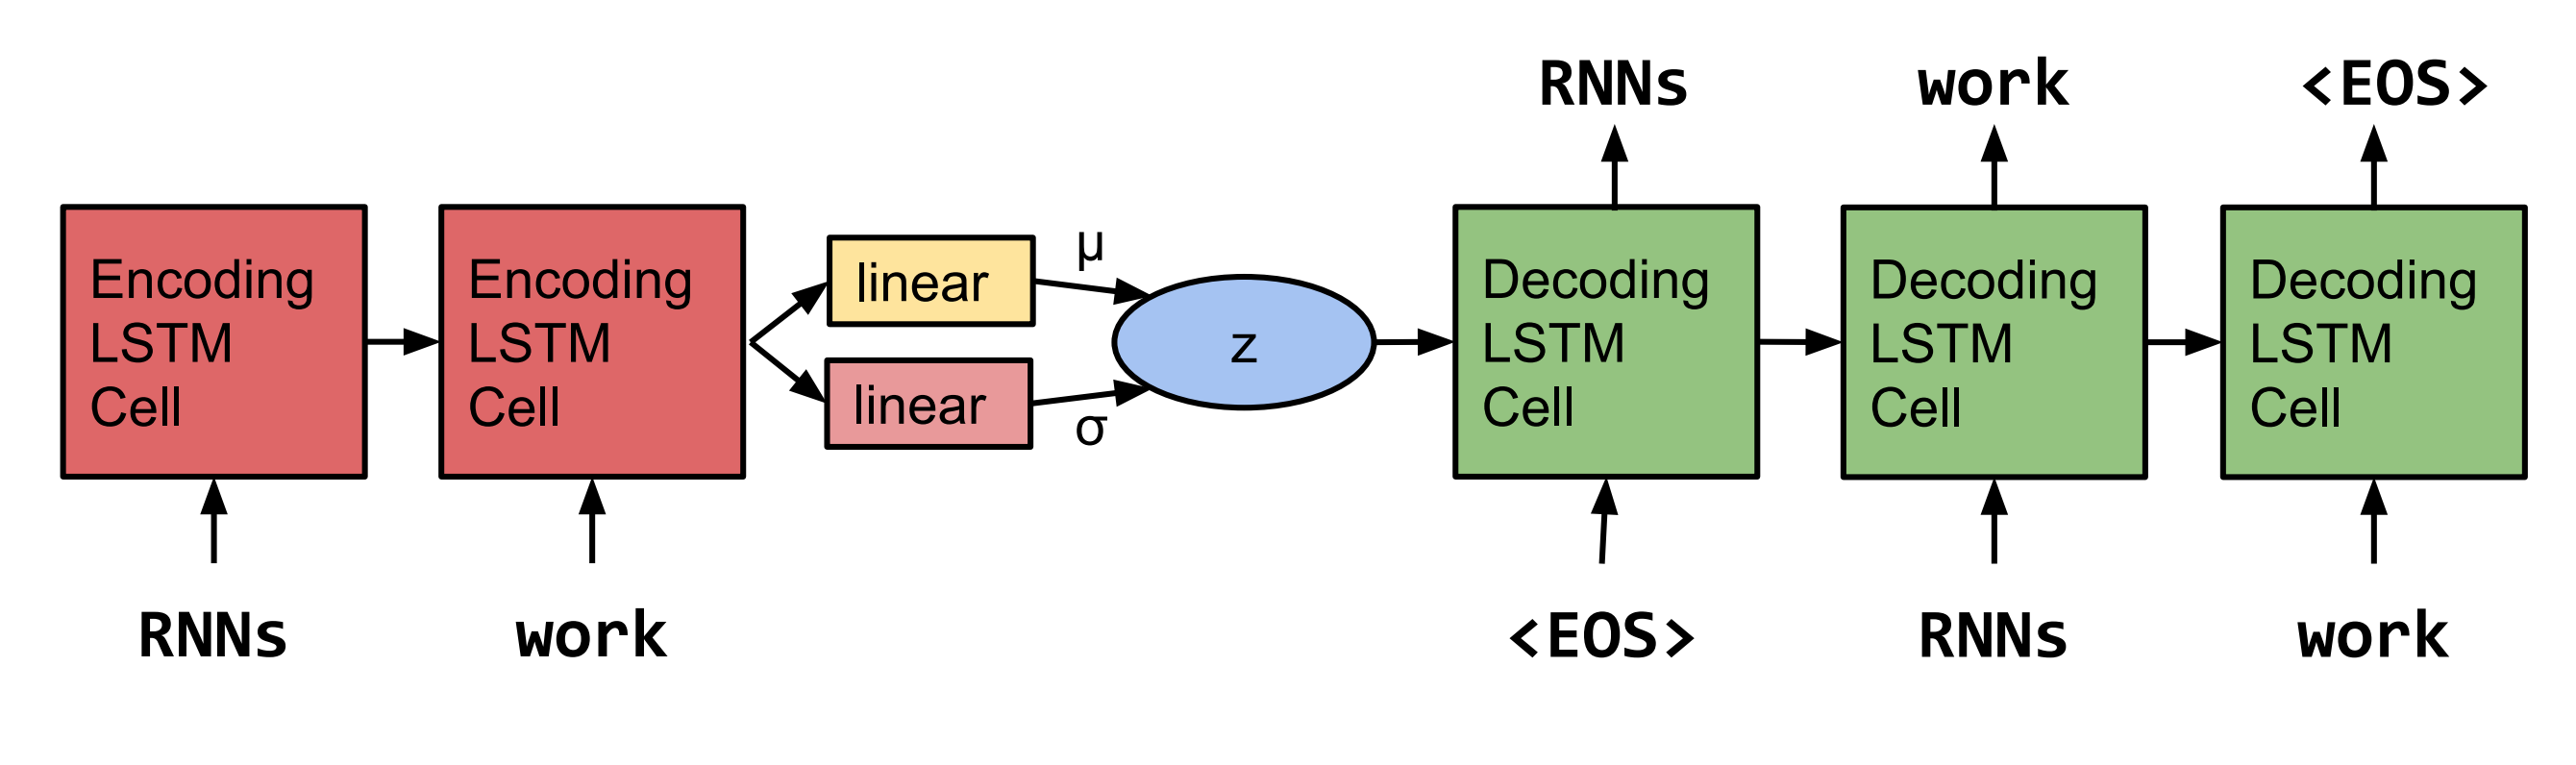

In [15]:
from IPython.display import Image
Image(filename='/content/figs/model.png')

## Training

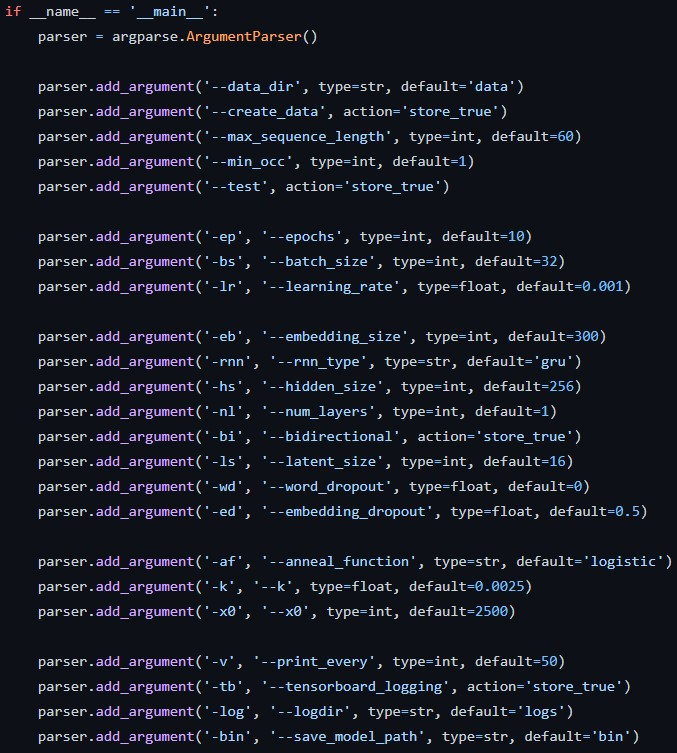

In [17]:
from IPython.display import Image
Image(filename='/content/figs/hyperparameters.png')

### ELBO

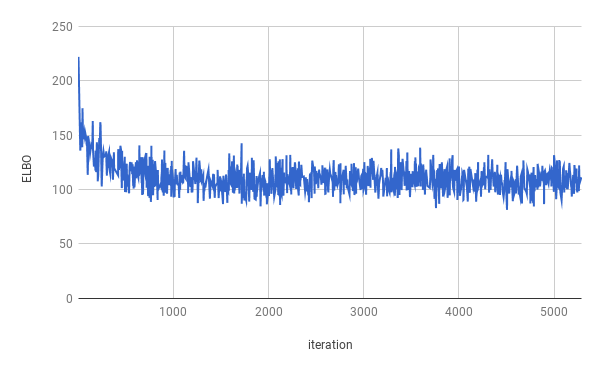

In [11]:
Image(filename='/content/figs/train_elbo.png')

### Negative log likelihood

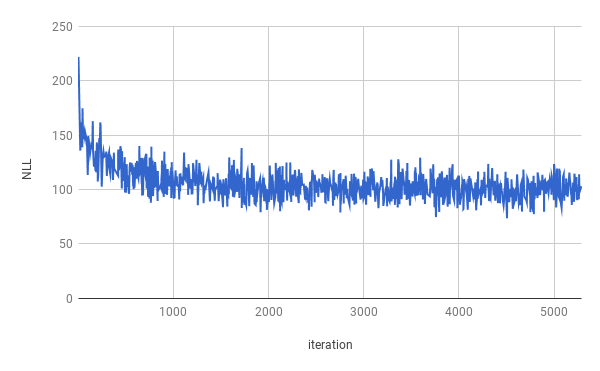

In [12]:
Image(filename='/content/figs/train_nll.png')

### KL divergence

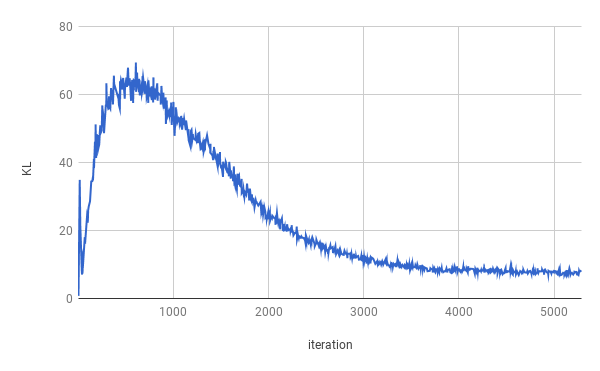

In [13]:
Image(filename='/content/figs/train_kl.png')

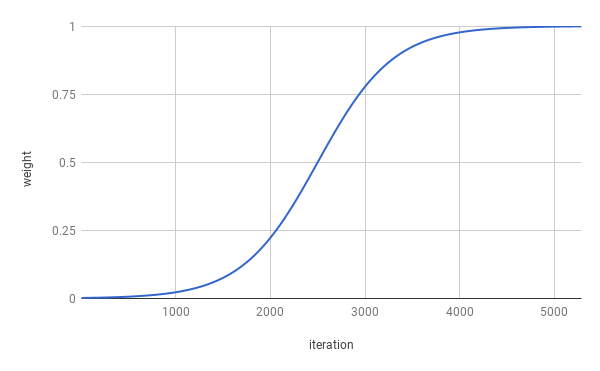

In [14]:
Image(filename='/content/figs/kl_weight.png')

## Generating sentences and interpolating between

----------SAMPLES----------  
etkinliğimizin 3.oturumu : turkcell t40 satışa sunuldu : s : s : s <eos>  
arnavut şevket internet paketi veren turkcell <eos>  
turkcell müzik'te ' the <unk> <unk> şarkısını dinliyorum . sen de dinlemek istersen ; <unk> <eos>  
ve <unk> … - turkcell global bilgi ' e geçmiş <eos>  
turkcell den gelen mesajlar bir operator | 01 <eos>  
turkcell <unk> ... haberleşme de taşıdığını açıkladı ... <eos>  
<unk> <unk> me turkcell e geçtim , vodafone ve vodafone yetkililerinden <unk> .. gömülü resim için kalıcı bağlantı <eos>  
<unk> ( @ turkcell superonline 16net ) - superonline <eos>  
turkcell 2 gb hediye vermis canım turkcell i love you biliyon <eos>  
<unk> @vodafonetr @vodafonedestek @vfreezone bir şey var mı geçsem <unk> turkcell <unk> <unk> . <eos>  

-------INTERPOLATION-------  
**bir adam varmış canı sıkılan <unk> turkcell super online <unk> <eos>**  
bir adam varmış canı sıkılan <unk> turkcell super online <unk> <eos>  
bir ayin için bir <unk> : turkcell enerji şirketi kuruyor <unk> <eos>  
bir @youtube oynatma listesine video ekledim : turkcell <unk> <unk> <eos>  
bir @youtube oynatma listesine video ekledim : turkcell <unk> <unk> <eos>  
bir @youtube oynatma listesine video ekledim <unk> turkcell <unk> <eos>  
kuzey kıbrıs turkcell superonline olarak <unk> <unk> <eos>  
sertab erener <unk> için turkcell <unk> <unk> <eos>  
sertab erener <unk> turkcell kuruçeşme arena <unk> <eos>  
**sertab erener <unk> turkcell kuruçeşme arena <unk> <eos>**